# Hobby-Recommendation

Dataset Information:
1. hobby: Name of the hobby
2. tags: Comma-separated list of tags describing the hobby
3. difficulty_level: Beginner, Intermediate, or Advanced
4. cost: Low, Medium, or High
5. time_requirement: Daily, Weekly, or Monthly
6. physical_activity_level: Low, Medium, or High
7. sociability: Individual, Group, or Mixed
8. location: Indoor, Outdoor, or Both
9. age_group: Children, Teens, Adults, or All Ages
10. equipment_needed: Low, Medium, or High

Dataset: https://huggingface.co/datasets/alperugurcan/Hobbies

Hugging Face: https://huggingface.co/spaces/alperugurcan/Hobbies-Recommendation

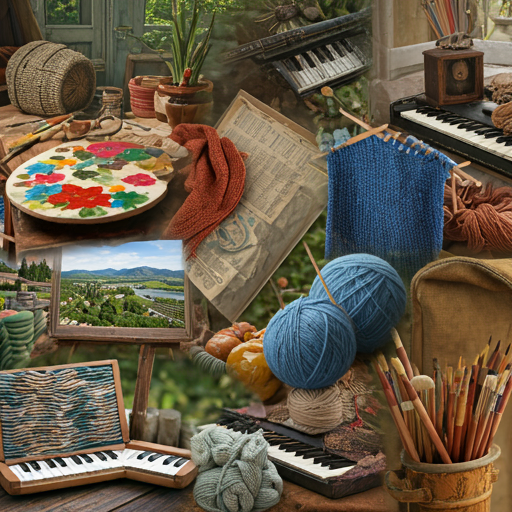

In [11]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics.pairwise import cosine_similarity

def hobby_recommender(input_hobbies, file_path='hobbies.csv', num_recommendations=3):
    # 1. Data Loading and Preprocessing
    df = pd.read_csv(file_path)  # Load CSV file into a DataFrame
    df['tags'] = df['tags'].str.split(',')  # Split tags into a list
    
    # 2. Feature Engineering
    mlb = MultiLabelBinarizer()  # Initialize MultiLabelBinarizer for tags
    tag_encoded = mlb.fit_transform(df['tags'])  # Encode tags
    
    categorical_features = ['difficulty_level', 'cost', 'time_requirement', 'physical_activity_level', 
                            'sociability', 'location', 'age_group', 'equipment_needed']
    
    ct = ColumnTransformer([
        ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_features)
    ])  # Set up OneHotEncoder for categorical features
    
    cat_encoded = ct.fit_transform(df)  # Encode categorical features
    
    # 3. Feature Matrix Creation
    feature_matrix = pd.concat([
        pd.DataFrame(tag_encoded, columns=mlb.classes_),
        pd.DataFrame(cat_encoded, columns=ct.get_feature_names_out())
    ], axis=1)  # Combine encoded tags and categorical features
    
    # 4. Similarity Calculation
    cosine_sim = cosine_similarity(feature_matrix, feature_matrix)  # Calculate cosine similarity
    
    # 5. Recommendation Generation
    indices = [df.index[df['hobby'].str.lower() == hobby.lower()][0] for hobby in input_hobbies if not df[df['hobby'].str.lower() == hobby.lower()].empty]  # Get indices of input hobbies
    sim_scores = cosine_sim[indices].sum(axis=0)  # Sum similarity scores for input hobbies
    recommendations = df['hobby'].iloc[sim_scores.argsort()[::-1]].tolist()  # Sort hobbies by similarity
    return [hobby for hobby in recommendations if hobby not in input_hobbies][:num_recommendations]  # Return top recommendations excluding input hobbies

# Example Usage
input_hobbies = ["Reading", "Jogging", "Photography"]
print(f"Recommendations: {hobby_recommender(input_hobbies)}")

Öneriler: ['Drawing', 'Sketching', 'Watercolor Painting']
